<a href="https://colab.research.google.com/github/Preeti27092000/profit_expense_linear_regression/blob/main/profit_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
df.shape

(1000, 5)

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [ ]:
print(df['State'].value_counts())
print(df['State'].value_counts()*100/len(df))

California    344
New York      334
Florida       322
Name: State, dtype: int64
California    34.4
New York      33.4
Florida       32.2
Name: State, dtype: float64


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

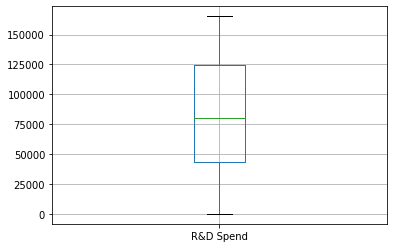

In [ ]:
df.boxplot(column = ['R&D Spend'])

122963.8976117

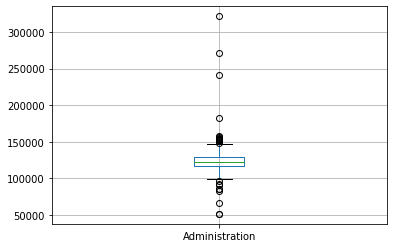

In [ ]:
df.boxplot(column = ['Administration'])
m = df['Administration'].mean()
m


In [ ]:
df1 = df.copy()
q1 = np.percentile(df1['Administration'],25)
q3 = np.percentile(df1['Administration'],75)
iqr = q3 - q1
low = q1 - 1.5*iqr
high = q3 + 1.5*iqr
print(low)
print(high)

97893.03512500001
147886.76772499998


In [ ]:
l1 = []
for i in df1['Administration']:
    if i > high or i < low:
        l1.append(i)
print(l1)

a = list(np.where(df['Administration'] < low))
print(a)

df1.drop(df1.index[a],inplace = True)
df1

[151377.59, 91391.77, 148718.95, 91790.61, 156547.42, 153514.11, 153773.43, 182645.56, 153032.06, 152701.92, 157693.92, 85047.44, 51283.14, 65947.93, 82982.09, 84710.77, 96189.63, 154806.14, 51743.15, 241926.31, 321652.14, 270939.86]
[array([ 4, 11, 35, 37, 38, 39, 41, 42, 48], dtype=int64)]


C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
5,131876.90,99814.710,362861.3600,New York,156991.12000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [ ]:
b = list(np.where(df1['Administration'] > high))
df1.drop(df1.index[b],inplace = True)
df1



,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.8000,471784.1000,New York,192261.83000
2,153441.51,101145.5500,407934.5400,Florida,191050.39000
3,144372.41,118671.8500,383199.6200,New York,182901.99000
5,131876.90,99814.7100,362861.3600,New York,156991.12000
6,134615.46,147198.8700,127716.8200,California,156122.51000
...,...,...,...,...,...
992,105127.00,125982.7298,271621.8728,Florida,138841.98810
993,46798.00,117368.4374,159075.9080,California,89012.02672
994,97209.00,124813.3635,256344.0701,New York,132077.70900
995,54135.00,118451.9990,173232.6695,California,95279.96251


In [ ]:
m = df1['Administration'].mean()
m
print(df1.shape)
df['Administration'] = df['Administration'].mask(df.Administration > high,m1,inplace = True)
df['Administration'] = df['Administration'].mask(df.Administratio < low,m1,inplace = True)


(978, 5)
